In [1]:
import pandas as pd

# Load the dataset
file_path = 'Sales.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
sales_data.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [2]:
# Checking for missing values
missing_values = sales_data.isnull().sum()

# Descriptive statistics
descriptive_stats = sales_data.describe()

missing_values, descriptive_stats


(Date                0
 Day                 0
 Month               0
 Year                0
 Customer_Age        0
 Age_Group           0
 Customer_Gender     0
 Country             0
 State               0
 Product_Category    0
 Sub_Category        0
 Product             0
 Order_Quantity      0
 Unit_Cost           0
 Unit_Price          0
 Profit              0
 Cost                0
 Revenue             0
 dtype: int64,
                  Day           Year   Customer_Age  Order_Quantity  \
 count  113036.000000  113036.000000  113036.000000   113036.000000   
 mean       15.665753    2014.401739      35.919212       11.901660   
 std         8.781567       1.272510      11.021936        9.561857   
 min         1.000000    2011.000000      17.000000        1.000000   
 25%         8.000000    2013.000000      28.000000        2.000000   
 50%        16.000000    2014.000000      35.000000       10.000000   
 75%        23.000000    2016.000000      43.000000       20.000000   
 ma

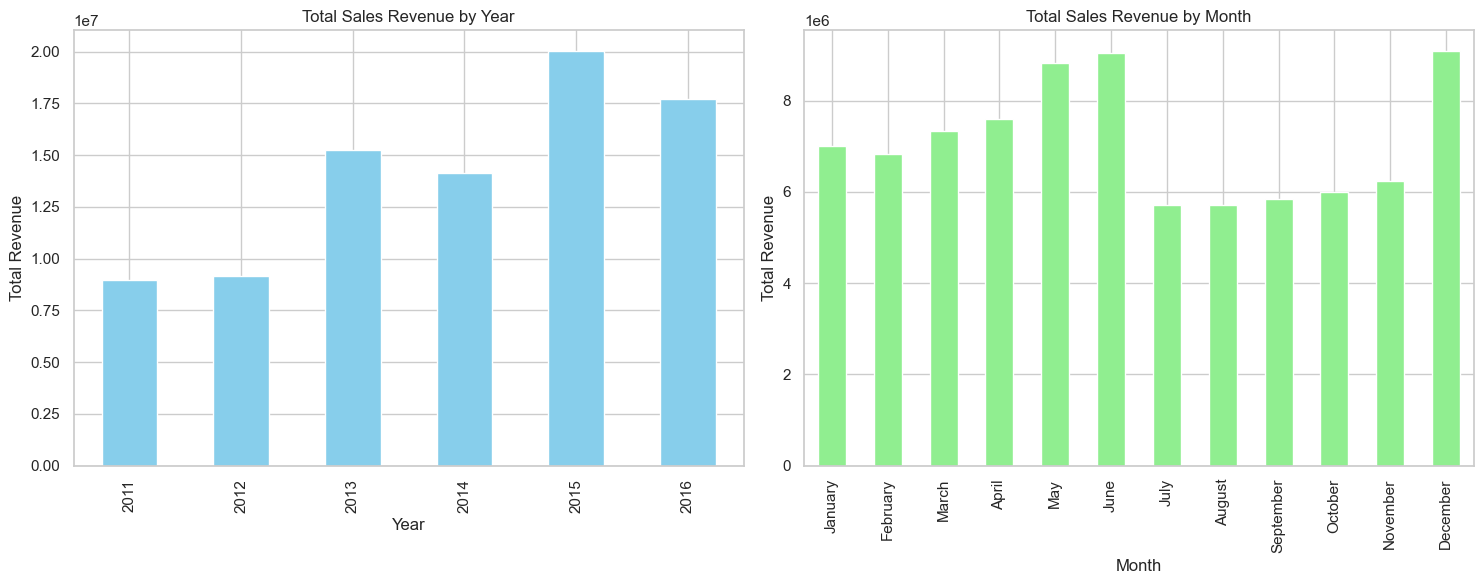

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Sales analysis by Year
sales_by_year = sales_data.groupby('Year')['Revenue'].sum()

# Sales analysis by Month
# Converting 'Month' to categorical type for proper sorting in plots
sales_data['Month'] = pd.Categorical(sales_data['Month'], 
                                     categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                 'July', 'August', 'September', 'October', 'November', 'December'],
                                     ordered=True)

sales_by_month = sales_data.groupby('Month')['Revenue'].sum()

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
sales_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Sales Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


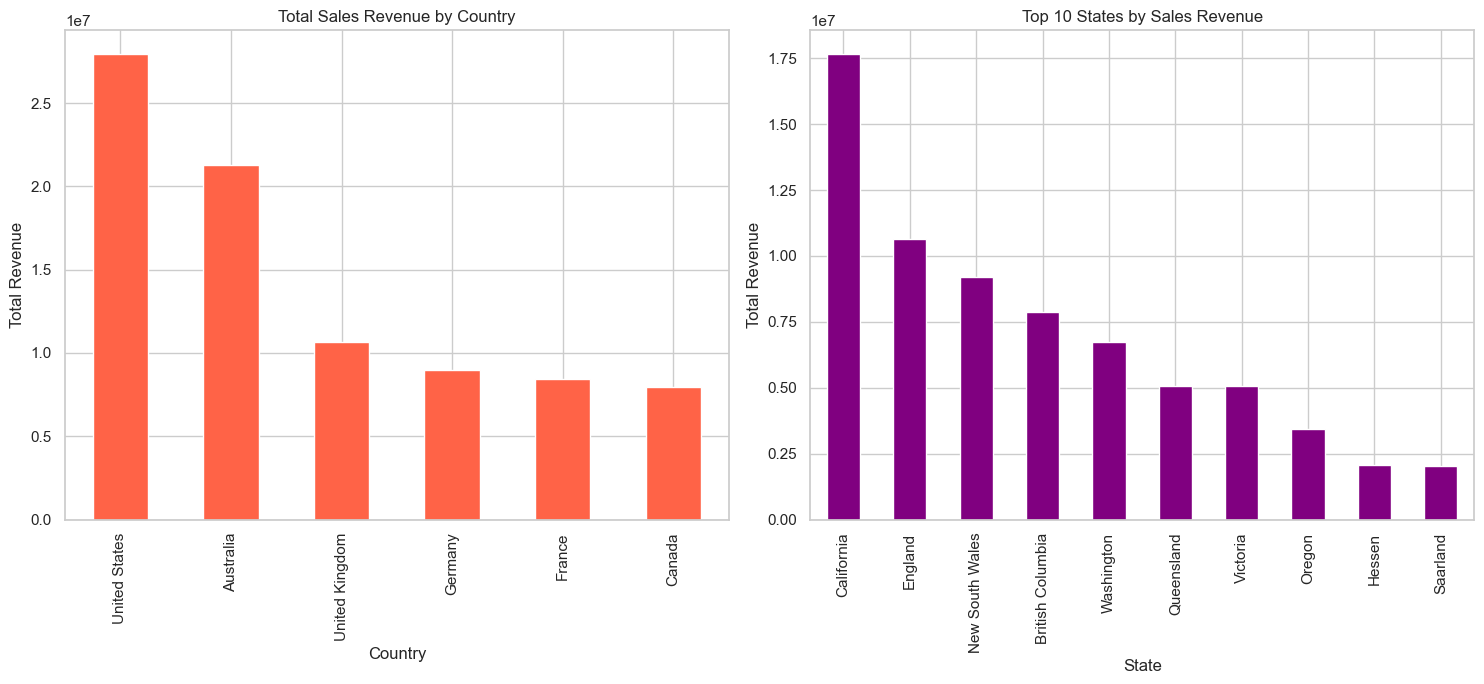

In [4]:
# Sales analysis by Country
sales_by_country = sales_data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Sales analysis by State
sales_by_state = sales_data.groupby('State')['Revenue'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sales_by_country.plot(kind='bar', color='tomato')
plt.title('Total Sales Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
sales_by_state.head(10).plot(kind='bar', color='purple') # Top 10 states
plt.title('Top 10 States by Sales Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


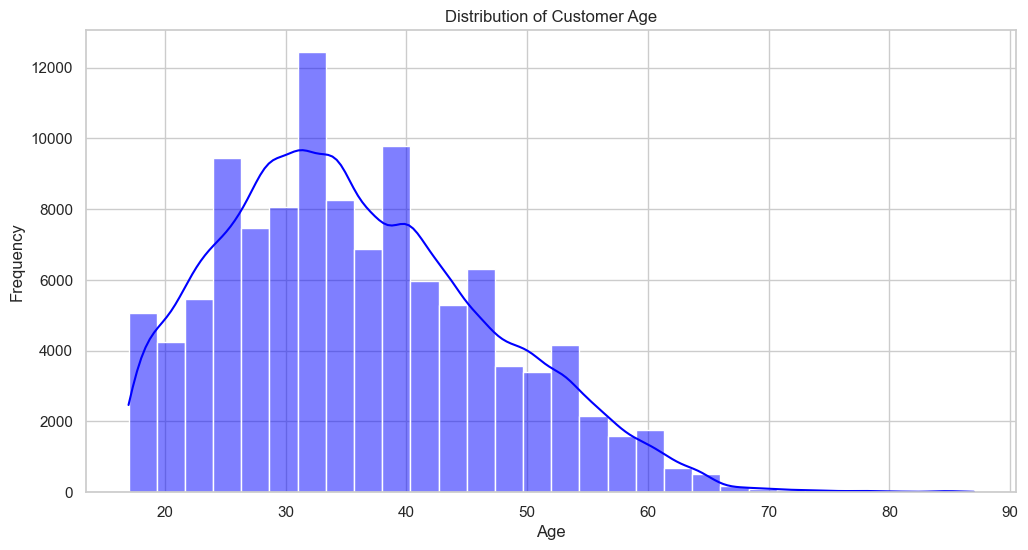

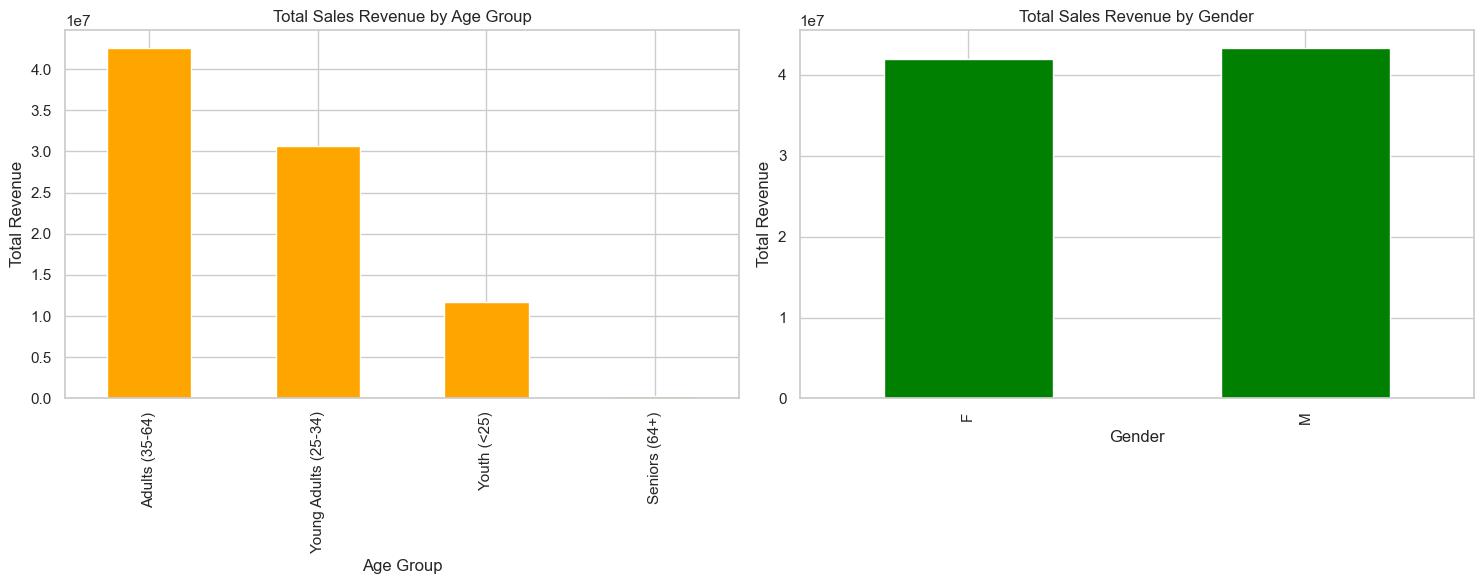

In [5]:
# Customer age distribution
plt.figure(figsize=(12, 6))
sns.histplot(sales_data['Customer_Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Sales by Age Group
sales_by_age_group = sales_data.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False)

# Sales by Gender
sales_by_gender = sales_data.groupby('Customer_Gender')['Revenue'].sum()

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sales_by_age_group.plot(kind='bar', color='orange')
plt.title('Total Sales Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
sales_by_gender.plot(kind='bar', color='green')
plt.title('Total Sales Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


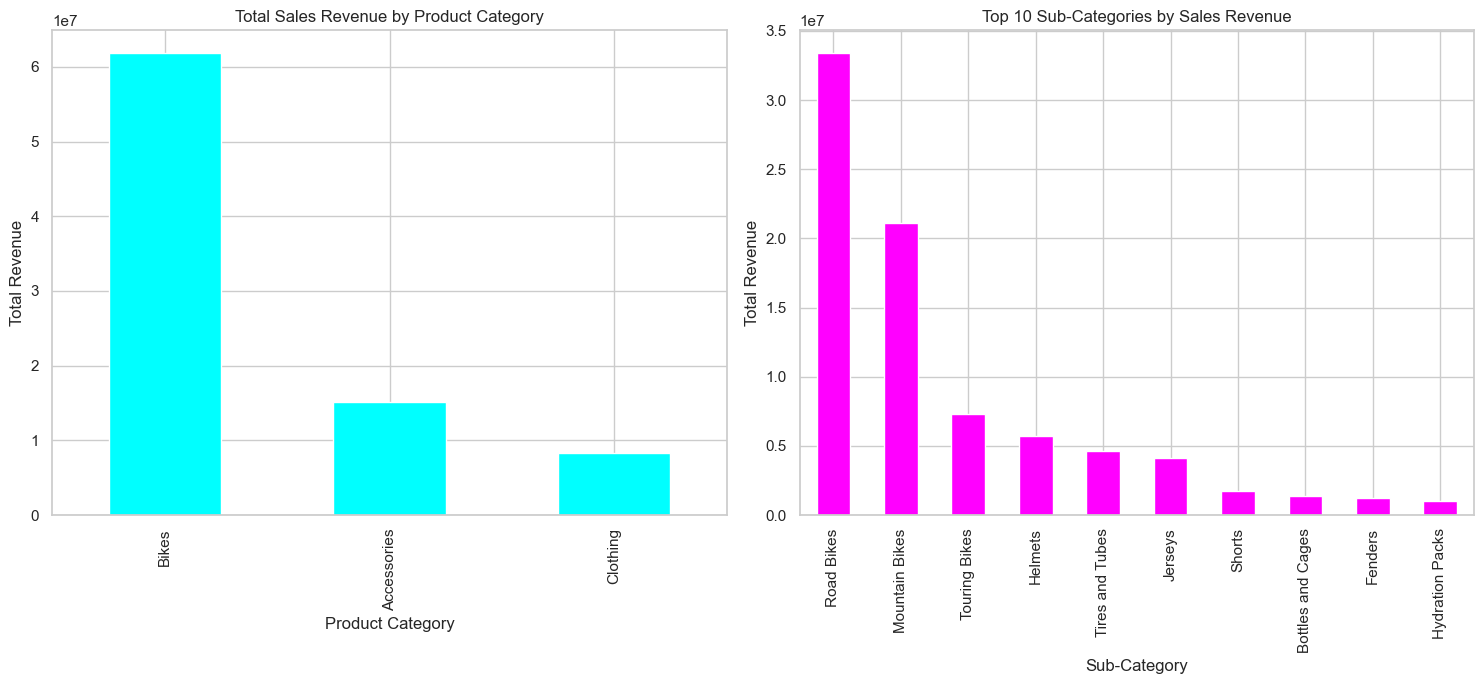

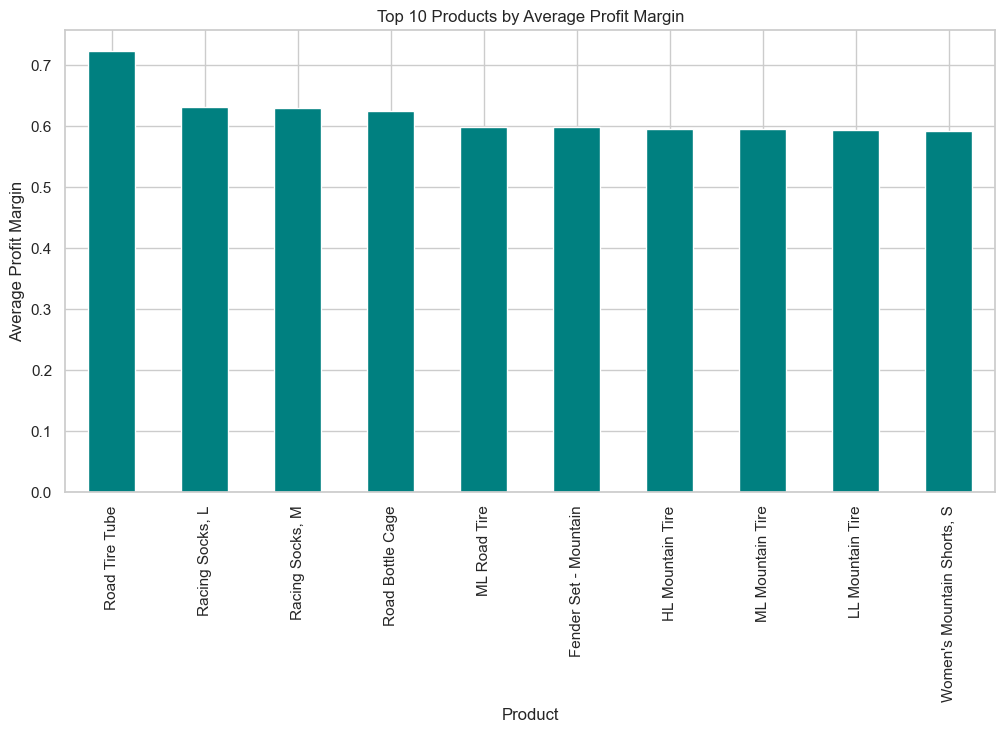

In [6]:
# Analysis of Product Categories and Sub-Categories

# Sales by Product Category
sales_by_category = sales_data.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

# Sales by Sub-Category
sales_by_sub_category = sales_data.groupby('Sub_Category')['Revenue'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sales_by_category.plot(kind='bar', color='cyan')
plt.title('Total Sales Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
sales_by_sub_category.head(10).plot(kind='bar', color='magenta') # Top 10 sub-categories
plt.title('Top 10 Sub-Categories by Sales Revenue')
plt.xlabel('Sub-Category')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()

# Analysis of Profitability of Products
# Calculating Profit Margin for each product
sales_data['Profit_Margin'] = sales_data['Profit'] / sales_data['Revenue']

# Average Profit Margin by Product
avg_profit_margin_by_product = sales_data.groupby('Product')['Profit_Margin'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
avg_profit_margin_by_product.plot(kind='bar', color='teal')
plt.title('Top 10 Products by Average Profit Margin')
plt.xlabel('Product')
plt.ylabel('Average Profit Margin')
plt.show()
